   Trip_Distance_km Time_of_Day Day_of_Week  Passenger_Count Traffic_Conditions Weather  Base_Fare  Per_Km_Rate  Per_Minute_Rate  Trip_Duration_Minutes  Trip_Price
0             19.35     Morning     Weekday              3.0                Low   Clear       3.56         0.80             0.32                  53.82     36.2624
1             47.59   Afternoon     Weekday              1.0               High   Clear        NaN         0.62             0.43                  40.57         NaN
2             36.87     Evening     Weekend              1.0               High   Clear       2.70         1.21             0.15                  37.27     52.9032
3             30.33     Evening     Weekday              4.0                Low     NaN       3.48         0.51             0.15                 116.81     36.4698
4               NaN     Evening     Weekday              3.0               High   Clear       2.93         0.63             0.32                  22.64     15.6180
5              8

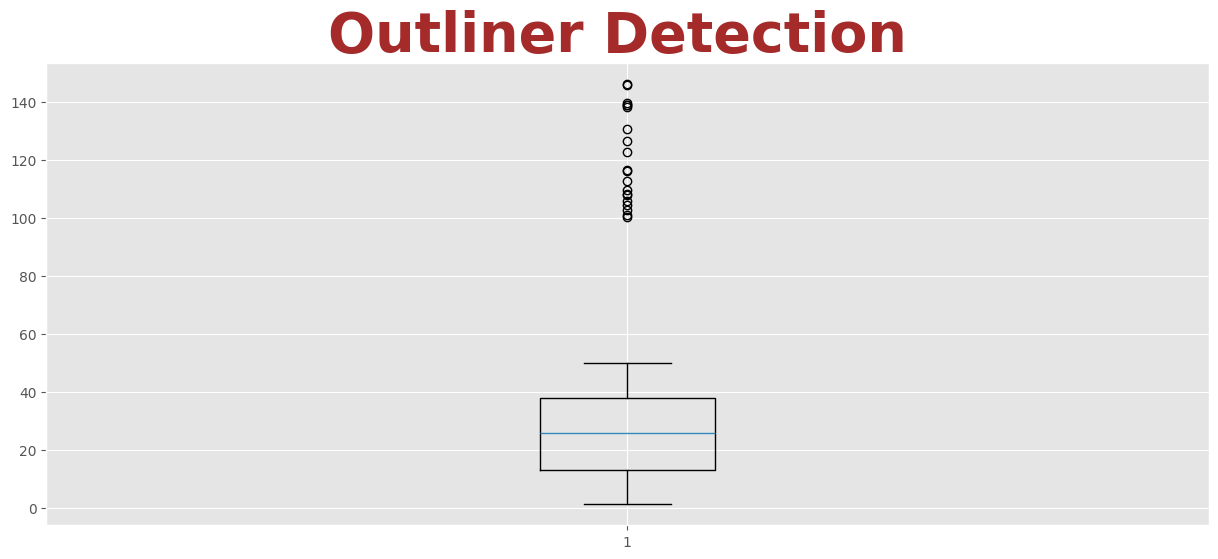

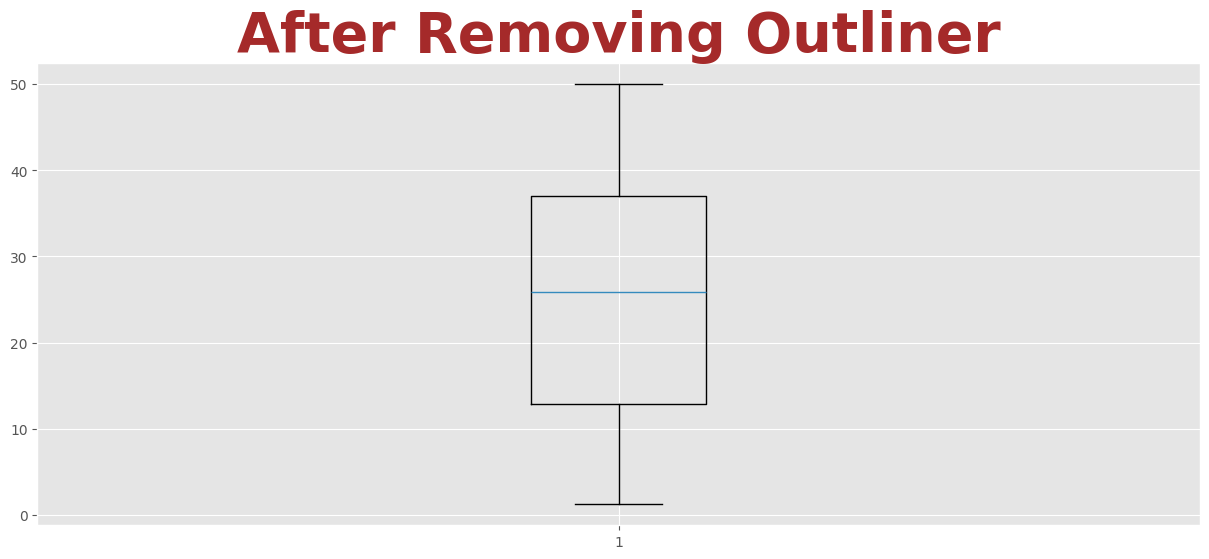

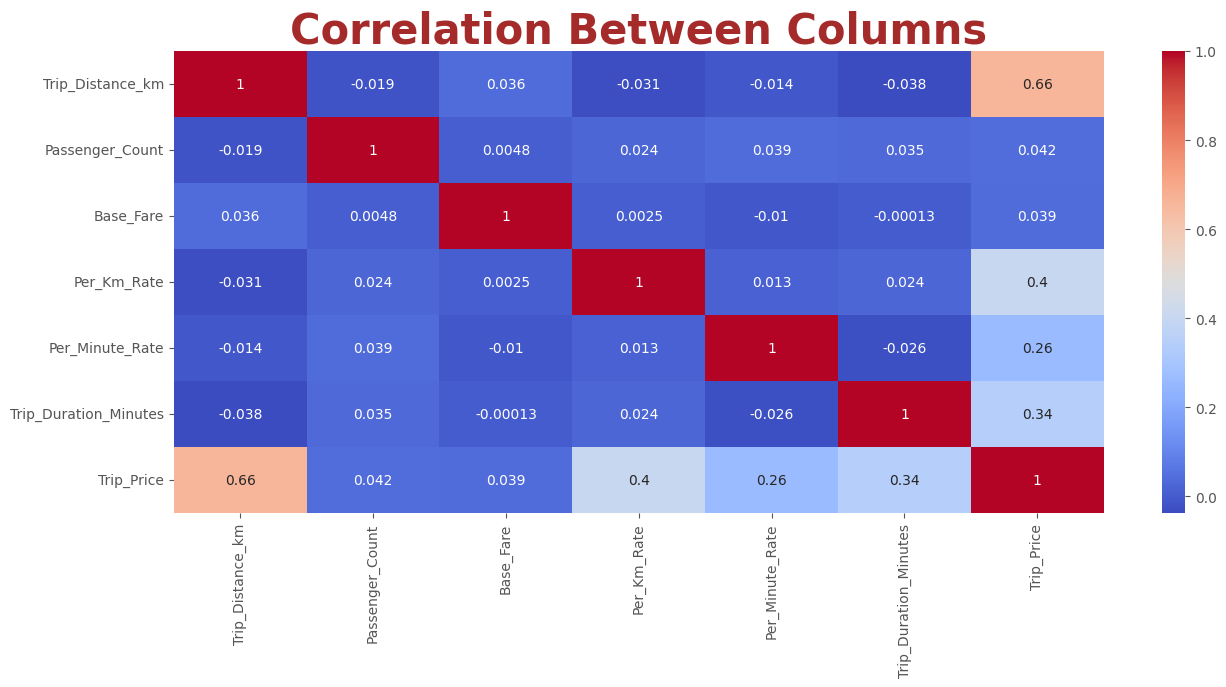

   Trip_Distance_km  Time_of_Day  Day_of_Week  Passenger_Count  Traffic_Conditions  Weather  Base_Fare  Per_Km_Rate  Per_Minute_Rate  Trip_Duration_Minutes  Trip_Price  Trip_Rate  Trip_Minute      Trip_SD
0             19.35            2            0              3.0                   1        0       3.56         0.80             0.32                  53.82     36.2624    15.4800      17.2224   266.602752
1             47.59            0            0              1.0                   0        0       3.56         0.62             0.43                  40.57     50.0745    29.5058      17.4451   514.731632
2             36.87            1            1              1.0                   0        0       2.70         1.21             0.15                  37.27     52.9032    44.6127       5.5905   249.407299
3             30.33            1            0              4.0                   1        0       3.48         0.51             0.15                 116.81     36.4698    15.4683  

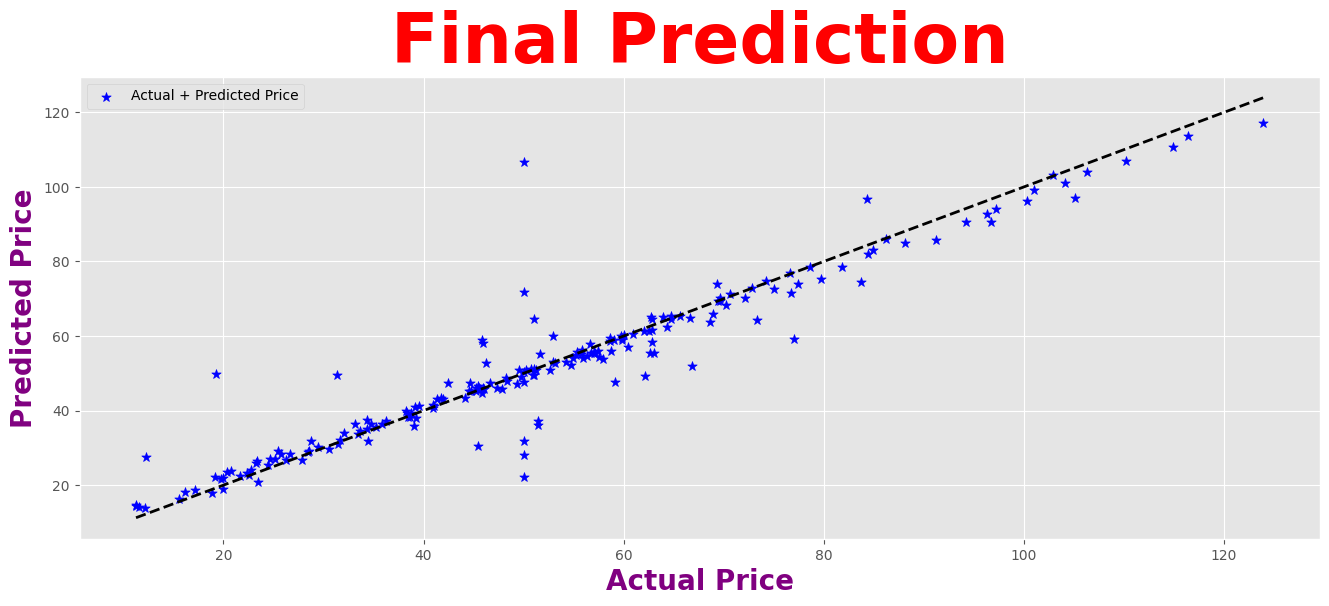

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)
pd.set_option('display.expand_frame_repr',False)


jp=pd.read_csv("taxi_trip_pricing.csv")
print(jp.head(10))

# print(jp.isna().sum())
# jp=jp[jp.duplicated()]
# print(jp)

jp[['Trip_Distance_km','Per_Minute_Rate','Trip_Duration_Minutes','Trip_Price']]=jp[['Trip_Distance_km','Per_Minute_Rate','Trip_Duration_Minutes','Trip_Price']].fillna(jp[['Trip_Distance_km','Per_Minute_Rate','Trip_Duration_Minutes','Trip_Price']].median())
jp=jp.ffill()
# print(jp.head(10))

plt.figure(figsize=(15,6))
plt.boxplot(jp['Trip_Distance_km'])
plt.title("Outliner Detection ",fontweight='bold',color='brown',fontsize=40)
# plt.savefig("Outliners Detection.png",dpi=300,bbox_inches="tight")
plt.show()


Q1=jp['Trip_Distance_km'].quantile(0.25)
Q3=jp['Trip_Distance_km'].quantile(0.75)

IQR=Q3-Q1
lower= Q1 - 1.5 * IQR
upper= Q3 + 1.5 * IQR

jp=jp[ (jp['Trip_Distance_km'] >= lower) & (jp['Trip_Distance_km'] <= upper) ]


plt.figure(figsize=(15,6))
plt.boxplot(jp['Trip_Distance_km'])
plt.title("After Removing Outliner",fontweight='bold',color='brown',fontsize=40)
# plt.savefig("Outliners Remove.png",dpi=300,bbox_inches="tight")
plt.show()


abc=jp[['Trip_Distance_km','Passenger_Count',
       'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'
    ]]  

plt.figure(figsize=(15,6))
sns.heatmap(abc.corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Between Columns",fontweight='bold',color='Brown',fontsize=30)
# plt.savefig("Correlation.png",dpi=300,bbox_inches="tight")
plt.show()


from sklearn.preprocessing import LabelEncoder

jp['Time_of_Day']=LabelEncoder().fit_transform(jp['Time_of_Day'])
jp['Day_of_Week']=LabelEncoder().fit_transform(jp['Day_of_Week'])
jp['Traffic_Conditions']=LabelEncoder().fit_transform(jp['Traffic_Conditions'])
jp['Weather']=LabelEncoder().fit_transform(jp['Weather'])


jp['Trip_Rate']=jp['Trip_Distance_km'] * jp['Per_Km_Rate']
jp['Trip_Minute']=jp['Per_Minute_Rate'] * jp['Trip_Duration_Minutes']
print(jp.head(10))


x=jp[['Trip_Distance_km', 'Time_of_Day','Day_of_Week','Traffic_Conditions','Weather','Per_Km_Rate','Per_Minute_Rate','Trip_Duration_Minutes','Trip_Rate','Trip_Minute']]    
y=jp['Trip_Price']


from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

model=LinearRegression()
score=cross_val_score(model,x_scaled,y,cv=5,scoring='r2')
print("CVS For Model",score)
print("Average CVS For Model",score.mean())

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , r2_score


x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=25)

from sklearn.linear_model  import LinearRegression

model=LinearRegression()

model.fit(x_train,y_train)
Y_Pred=model.predict(x_test)

Train_Score=model.score(x_train,y_train)
Test_Score=model.score(x_test,y_test)

print("Train Score == ",Train_Score)
print("Test Score == ",Test_Score)

print("LinearRegression MAE === ",mean_absolute_error(y_test,Y_Pred))
print("LinearRegression r2  === ",r2_score(y_test,Y_Pred))


# from sklearn.ensemble  import RandomForestRegressor

# model=RandomForestRegressor()

# model.fit(x_train,y_train)
# Y_Pred=model.predict(x_test)

# Train_Score=model.score(x_train,y_train)
# Test_Score=model.score(x_test,y_test)

# print("Train Score == ",Train_Score)
# print("Test Score == ",Test_Score)

# print("RandomForestRegression MAE === ",mean_absolute_error(y_test,Y_Pred))
# print("RandomForestRegression r2  === ",r2_score(y_test,Y_Pred))


# from sklearn.tree  import DecisionTreeRegressor

# model=DecisionTreeRegressor()

# model.fit(x_train,y_train)
# Y_Pred=model.predict(x_test)

# Train_Score=model.score(x_train,y_train)
# Test_Score=model.score(x_test,y_test)

# print("Train Score == ",Train_Score)
# print("Test Score == ",Test_Score)

# print("DecisionTreeRegression MAE === ",mean_absolute_error(y_test,Y_Pred))
# print("DecisionTreeRegression r2  === ",r2_score(y_test,Y_Pred))

plt.figure(figsize=(16,6))
plt.scatter(y_test,Y_Pred,marker="*",s=50,color='blue',label='Actual + Predicted Price')
plt.plot( [y_test.min(),y_test.max()],[y_test.min(),y_test.max()],linestyle="--",linewidth=2,color='black')
plt.xlabel("Actual Price",color='purple',fontsize=20,fontweight='bold')
plt.ylabel("Predicted Price",color='purple',fontsize=20,fontweight='bold')
plt.title("Final Prediction",fontweight='bold',color='red',fontsize=50)
plt.legend(loc='upper left')
# plt.savefig("Final Prediction.png",dpi=300,bbox_inches="tight")
plt.show()